## DAA Group 5 Assignment
- ODONGKARA OSCAR S23B23/085 B24774
- OBBA MARK CALVIN S23B23/047 B24277
- NANKYA ZAHARAH  S23B23/082  B24771

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

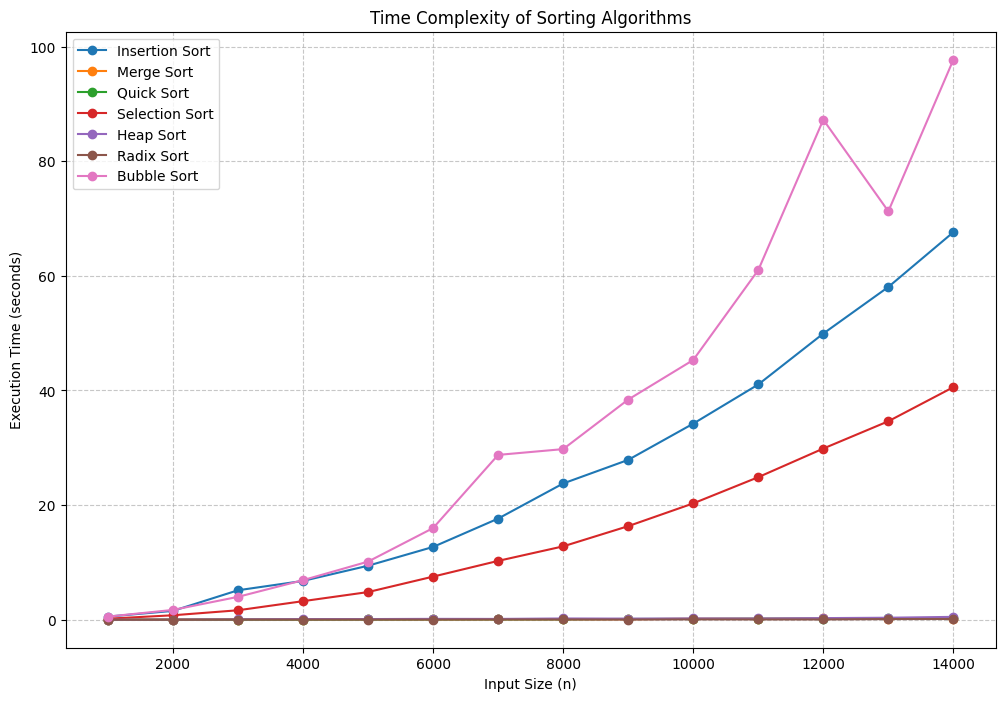

In [ ]:
# Swap function used by multiple sorting algorithms
def swap(lst, i, j):
    temp = lst[i]
    lst[i] = lst[j]
    lst[j] = temp
    return lst

# Insertion Sort
def insertionSort(A):
    for pos in range(1, len(A)):
        nextpos = pos
        while nextpos > 0 and A[nextpos] < A[nextpos-1]:
            swap(A, nextpos, nextpos-1)
            nextpos -= 1

# Merge Sort
def merge_sort(a):
    if len(a) >= 2:
        left = a[:len(a) // 2]
        right = a[len(a) // 2:]
        merge_sort(left)
        merge_sort(right)
        merge(a, left, right)

def merge(result, left, right):
    i1, i2 = 0, 0
    for i in range(len(result)):
        if i2 >= len(right) or (i1 < len(left) and left[i1] <= right[i2]):
            result[i] = left[i1]
            i1 += 1
        else:
            result[i] = right[i2]
            i2 += 1

# Quick Sort
def partition(A, low, high):
    i = low - 1
    pivot = A[high]
    for j in range(low, high):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[high] = A[high], A[i + 1]
    return i + 1

def quickSort(A, low, high):
    if low < high:
        pi = partition(A, low, high)
        quickSort(A, low, pi - 1)
        quickSort(A, pi + 1, high)

# Selection Sort
def selectionSort(A):
    for i in range(len(A)):
        min_idx = i
        for j in range(i + 1, len(A)):
            if A[j] < A[min_idx]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i]

# Heap Sort
def heapify(A, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and A[i] < A[left]:
        largest = left
    if right < n and A[largest] < A[right]:
        largest = right
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, n, largest)

def heapSort(A):
    n = len(A)
    for i in range(n // 2 - 1, -1, -1):
        heapify(A, n, i)
    for i in range(n - 1, 0, -1):
        A[i], A[0] = A[0], A[i]
        heapify(A, i, 0)

# Radix Sort
def countingSortForRadix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]

def radixSort(arr):
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        countingSortForRadix(arr, exp)
        exp *= 10

# Bubble Sort
def bubbleSort(A):
    n = len(A)
    for i in range(n):
        for j in range(0, n - i - 1):
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]

# Sorting methods and labels
sorts = [
    {"name": "Insertion Sort", "sort": lambda A: insertionSort(A)},
    {"name": "Merge Sort", "sort": lambda A: merge_sort(A)},
    {"name": "Quick Sort", "sort": lambda A: quickSort(A, 0, len(A) - 1)},
    {"name": "Selection Sort", "sort": lambda A: selectionSort(A)},
    {"name": "Heap Sort", "sort": lambda A: heapSort(A)},
    {"name": "Radix Sort", "sort": lambda A: radixSort(A)},
    {"name": "Bubble Sort", "sort": lambda A: bubbleSort(A)}
]

# Input sizes to test
elements = np.array([i * 1000 for i in range(1, 15)])

# Set up the plot
plt.figure(figsize=(12, 8))
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of Sorting Algorithms')
plt.grid(True, linestyle='--', alpha=0.7)

# Measure execution time for each sorting algorithm
for sort in sorts:
    times = []
    for n in elements:
        a = np.random.randint(1000, size=n)
        start = time.time()
        sort["sort"](a)
        times.append(time.time() - start)
    plt.plot(elements, times, label=sort["name"], marker='o')

# Add legend and display the plot
plt.legend()
plt.show()


## The Time Complexities of each sort algorithm

1. **Insertion Sort**:
   - **Best Case**: \(O(n)\) (when the array is already sorted)
   - **Average Case**: \(O(n^2)\)
   - **Worst Case**: \(O(n^2)\)
   - **Space Complexity**: \(O(1)\)

2. **Merge Sort**:
   - **Best, Average, and Worst Case**: \(O(n log n)\)
   - **Space Complexity**: \(O(n)\)

3. **Quick Sort**:
   - **Best and Average Case**: \(O(n log n)\)
   - **Worst Case**: \(O(n^2)\) (occurs when the pivot is the smallest or largest element repeatedly)
   - **Space Complexity**: \(O(log n)\) (due to recursion)

4. **Selection Sort**:
   - **Best, Average, and Worst Case**: \(O(n^2)\)
   - **Space Complexity**: \(O(1)\)

5. **Heap Sort**:
   - **Best, Average, and Worst Case**: \(O(n log n)\)
   - **Space Complexity**: \(O(1)\)

6. **Radix Sort**:
   - **Best, Average, and Worst Case**: \(O(d \cdot (n + b))\), where:
     - \(d\) is the number of digits in the largest number.
     - \(b\) is the base, often assumed to be \(10\) for decimal numbers.
   - **Space Complexity**: \(O(n + b)\)

7. **Bubble Sort**:
   - **Best Case**: \(O(n)\) (when the array is already sorted)
   - **Average and Worst Case**: \(O(n^2)\)
   - **Space Complexity**: \(O(1)\)

### Summary Table:

| Algorithm       | Best Case      | Average Case    | Worst Case     | Space Complexity |
|-----------------|----------------|-----------------|----------------|------------------|
| Insertion Sort  | \(O(n)\)       | \(O(n^2)\)      | \(O(n^2)\)     | \(O(1)\)         |
| Merge Sort      | \(O(n log n)\) | \(O(n log n)\) | \(O(n log n)\) | \(O(n)\)         |
| Quick Sort      | \(O(n log n)\) | \(O(n log n)\) | \(O(n^2)\)     | \(O(log n)\)    |
| Selection Sort  | \(O(n^2)\)     | \(O(n^2)\)      | \(O(n^2)\)     | \(O(1)\)         |
| Heap Sort       | \(O(n log n)\) | \(O(n log n)\) | \(O(n log n)\) | \(O(1)\)         |
| Radix Sort      | \(O(d(n + b))\)| \(O(d(n + b))\) | \(O(d(n + b))\)| \(O(n + b)\)      |
| Bubble Sort     | \(O(n)\)       | \(O(n^2)\)      | \(O(n^2)\)     | \(O(1)\)         |

These time complexities can help you predict the performance of each sorting algorithm on various input sizes and distributions.